Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library(tidymodels)


Warning message:
“Failed to locate timezone database”
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ recipes      1.0.9
✔ dials        1.2.0     ✔ rsample      1.2.0
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.4.4     ✔ tidyr        1.3.0
✔ infer        1.0.5     ✔ tune         1.1.2
✔ modeldata    1.2.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.2.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:
glimpse(diabetes_train)


Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 4, 10, 1, 3, 8, 1, 13, 5, 5, 3, 6, 1…
$ Glucose                  <dbl> 85, 89, 116, 110, 139, 103, 126, 99, 97, 145,…
$ BloodPressure            <dbl> 66, 66, 74, 92, 80, 30, 88, 84, 66, 82, 92, 7…
$ SkinThickness            <dbl> 29, 23, 0, 0, 0, 38, 41, 0, 15, 19, 0, 26, 11…
$ Insulin                  <dbl> 0, 94, 0, 0, 0, 83, 235, 0, 140, 110, 0, 0, 5…
$ BMI                      <dbl> 26.6, 28.1, 25.6, 37.6, 27.1, 43.3, 39.3, 35.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.191, 1.441, 0.183, 0.7…
$ Age                      <dbl> 31, 21, 30, 30, 57, 33, 27, 50, 22, 57, 38, 6…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a linear regression model?

**Answer:**

**The Outcome variable would be most suitable to be the outcome in a linear regression model because it is most likely to be dependent on the other variables in the data set.**

❓ Navigate to [Kaggle page]() for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test   |
| BMI         | Body mass index (weight in kg/(height in m)^2)            |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

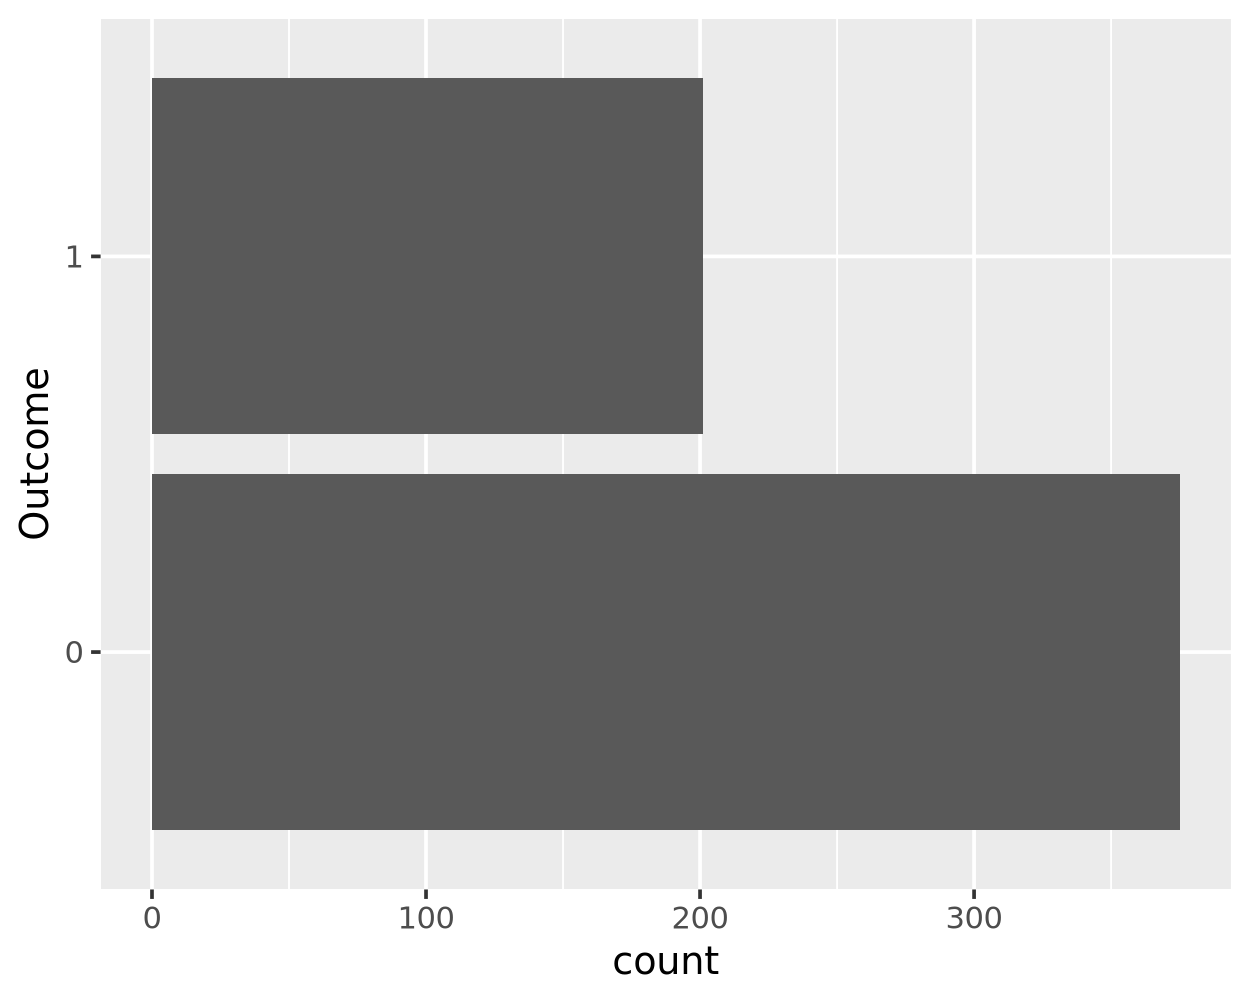

In [4]:
diabetes_train |> 
    ggplot(mapping = aes(y = Outcome)) +
    geom_bar()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

**There is a clear difference in the counts of each outcome, with "0" outnumbering "1" by nearly double.**

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [5]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

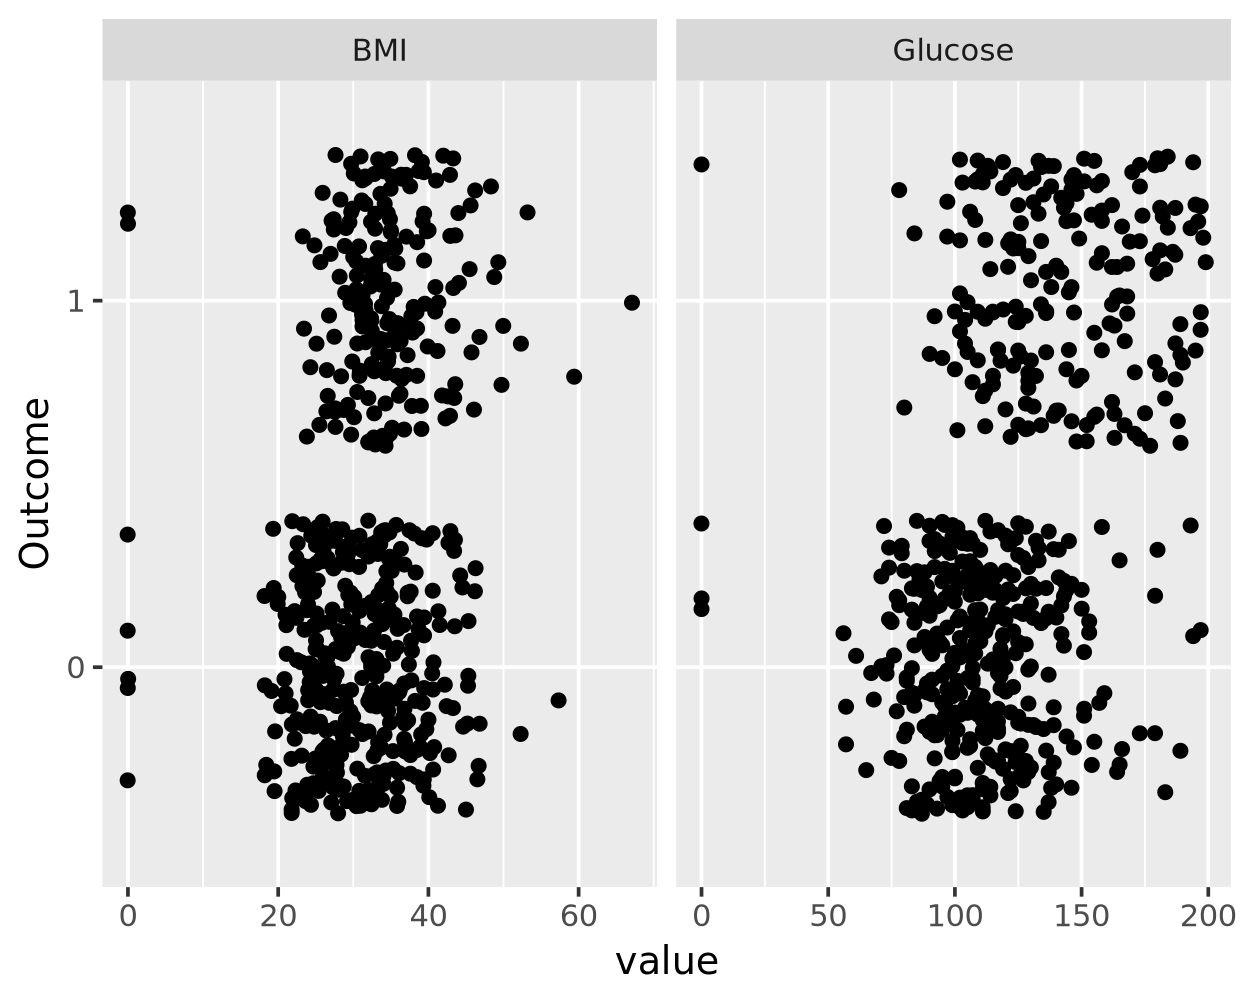

In [6]:
plot_df |>
    ggplot(mapping = aes(y = Outcome, x = value)) +
    geom_jitter() +
    facet_wrap(~name, ncol = 2, scales = 'free_x')

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

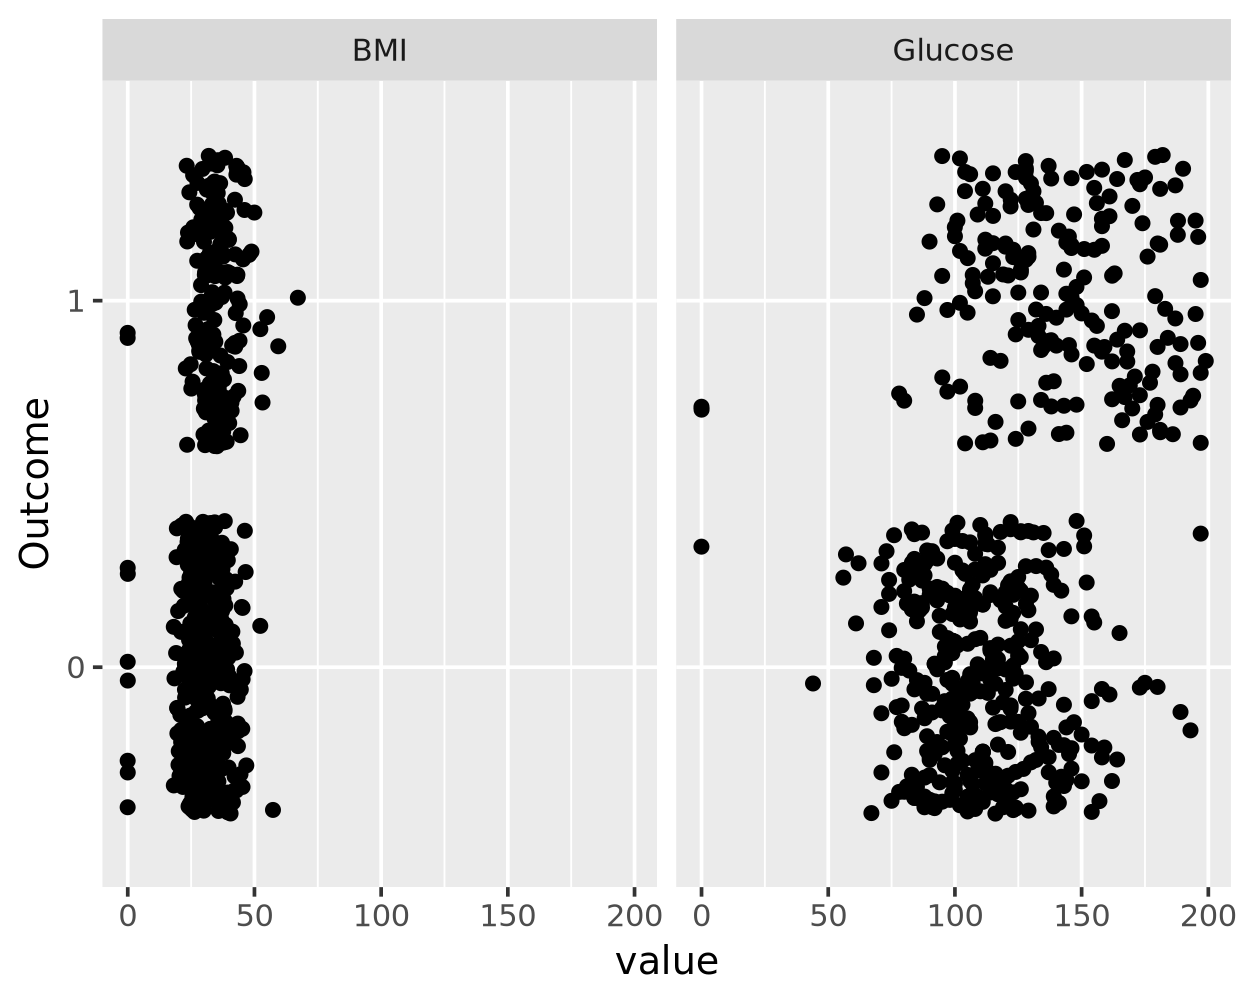

In [9]:
plot_df |>
    ggplot(mapping = aes(y = Outcome, x = value)) +
    geom_jitter() +
    facet_wrap(~name, ncol = 2)

**Removing " scales = 'free_x' " setst the x scale of both facets to the same range, in this specific case this crunches BMI down to a very small section of the plot**


Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [13]:
rec = recipe(Outcome ~ BMI + Glucose, data = diabetes_train)
print(rec) #checking created recipe
rec_prep = prep(rec, diabetes_train)
print(rec_prep) #checking trained recipe
mod = logistic_reg() |> set_engine("glm")
print(mod) #checking model
mod_fit = mod |> fit(Outcome ~ BMI + Glucose, juice(rec_prep))
tidy(mod_fit) #checking trained model



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Training information 

Training data contained 576 data points and no incomplete rows.



Logistic Regression Model Specification (classification)

Computational engine: glm 



term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.49898831,0.698189724,-10.740617,6.560458e-27
BMI,0.06079800,0.015115795,4.022150,5.766919e-05
Glucose,0.03919657,0.003999833,9.799551,1.130875e-22


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabeted_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [16]:
diabetes_test_wPrd = augment(mod_fit,juice(rec_prep))

diabetes_test_wPrd |> head()



.pred_class,.pred_0,.pred_1,BMI,Glucose,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0.9275771,0.07242293,26.6,85,0
0,0.9090483,0.09095170,28.1,89,0
0,0.8015098,0.19849024,25.6,116,0
0,0.7112290,0.28877096,37.6,110,0
0,0.5994176,0.40058238,27.1,139,0
0,0.6961832,0.30381678,43.3,103,0


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [17]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 107  30
         1  18  37

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer: 
- 67 individuals had diabetes in the test data (Truth {1} column)
- 55 individials had diabetes in the trained data (Prediction {1} row)
- 18 individuals who were predicted to have diabetes (Prediction {1} row) did not have diabetes (Truth {0} column)

Of 192 individuals, the model correctly predicted the status of 144 of them for a roughly 75% accuracy rate.
**